In [3]:
from manim import *
import jupyter_capture_output

video_scene = " -v WARNING --progress_bar None --disable_caching et3_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s et3_Scene"

In [105]:
class Eye(Mobject):
    def __init__(self, position, size, **kwargs):
        super().__init__(**kwargs)
        self.eye_center = position
        self.eye_radius = size
        circle = Circle(radius = self.eye_radius, color = DARK_GREY, stroke_width = 15.0).move_to(self.eye_center)
        self.add(circle)

    # returns the pupil
    def get_pupil(self, pupil_size, pupil_pradius, pupil_angle):
        pupil_radius = pupil_pradius * (self.eye_radius - pupil_size)
        self.pupil_center = self.eye_center + np.array([pupil_radius*np.cos(pupil_angle), pupil_radius*np.sin(pupil_angle), 0])
        pupil_circle = Circle(radius = pupil_size, fill_opacity = 1).move_to(self.pupil_center).set_color(BLACK)
        return pupil_circle
    
    # returns cornea reflection
    def get_reflection(self, reflect_pradius, reflect_angle):
        reflect_radius = reflect_pradius * self.eye_radius
        self.reflect_center = self.eye_center + np.array([reflect_radius*np.cos(reflect_angle), reflect_radius*np.sin(reflect_angle), 0])
        reflect_dot = Dot(point = self.reflect_center, radius = 0.1, fill_opacity = 0.8).set_color([PURE_RED, RED])
        cross_length = 0.75
        reflect_horizontal = Line(start = self.reflect_center - cross_length*RIGHT, end = self.reflect_center + cross_length*RIGHT, stroke_width = 1, color = RED)
        reflect_vertical = Line(start = self.reflect_center - cross_length*UP, end = self.reflect_center + cross_length*UP, stroke_width = 1, color = RED)
        return VGroup(reflect_dot, reflect_horizontal, reflect_vertical)
        #return reflect_dot
    
    def get_connector(self):
        connect_vector = Line(start = self.reflect_center, end = self.pupil_center, color = BLUE).add_tip(tip_length = 0.25, tip_width = 0.25)
        return connect_vector


Output saved by creating file at animations/eye_tracking_3/eye_tracking_3.mp4.


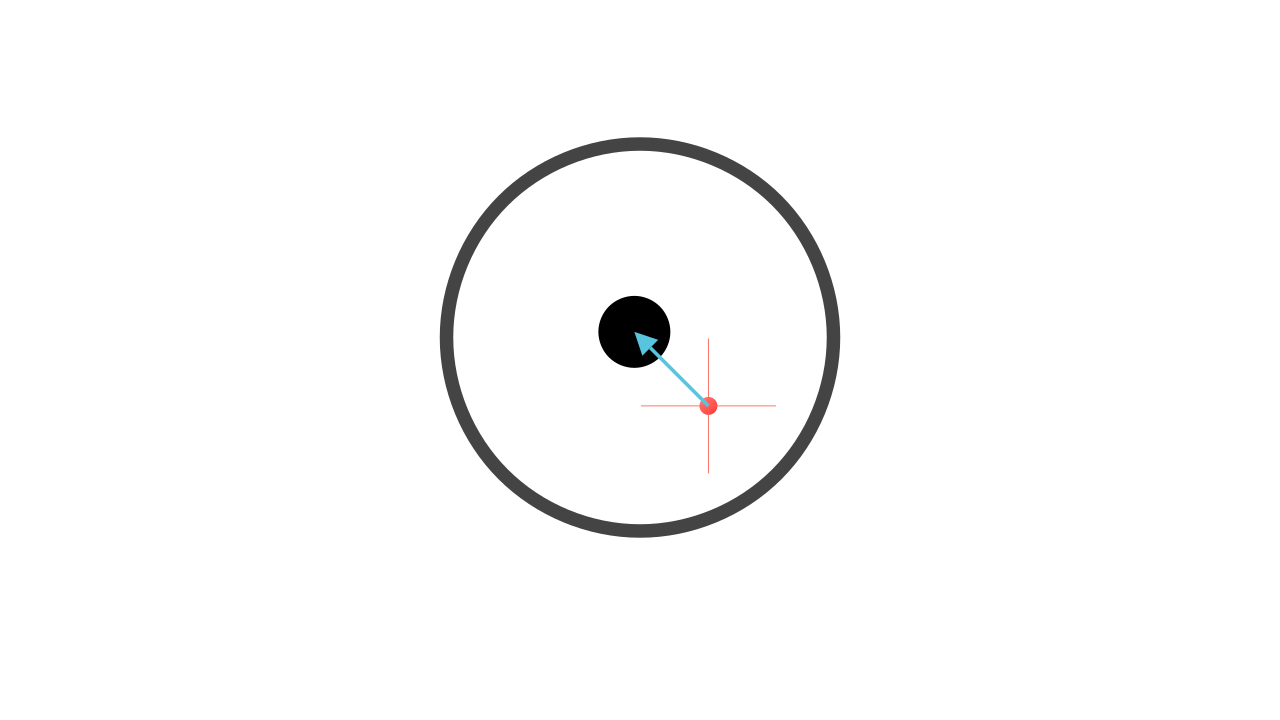

In [117]:
%%capture_video --path "animations/eye_tracking_3/eye_tracking_3.mp4"
%%manim -qm --fps 60 $video_scene


class et3_Scene(Scene):
    def construct(self):
        self.camera.background_color = WHITE

        human_eye = ImageMobject("external_media/Eye1.jpg")
        #self.add(human_eye)

        eye = Eye(position = np.array([0, 0.25, 0]), size = 2.15)
        self.add(eye)

        pupil = eye.get_pupil(pupil_size = 0.38, pupil_pradius = 0.05, pupil_angle = 3/4*PI)
        self.add(pupil)

        cornea_reflection = eye.get_reflection(reflect_pradius = 0.5, reflect_angle = 7/4*PI)
        self.add(cornea_reflection)

        vector = eye.get_connector()
        self.add(vector)

